# U.S. Medical Insurance Costs

In [2]:
import pandas as pd

In [20]:
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("insurance.csv")

In [9]:
print(df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [7]:
print(df.shape)

(1338, 7)


In [ ]:
# Cleaning for any null values

In [8]:
if df.isnull().values.any():
    print(df[df.isnull().any(axis=1)])
    df.dropna(inplace=True)
else:
    print('No null or missing values found')

No null or missing values found


In [ ]:
# checking for duplicates

In [10]:
if df.duplicated().any():
    print(df[df.duplicated()])
    df.drop_duplicates(inplace=True)
else:
    print('No duplicate values found')

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [ ]:
# post cleanup

In [13]:
print(df.shape)

(1337, 7)


In [ ]:
# Understanding the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [ ]:
# to give data about numbers

In [15]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Visualizing the data

In [17]:
def create_box_plots_numerical_fields():
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].boxplot(df['age'], vert=False)
    axes[0, 0].set_title('Age')
    
    axes[0, 1].boxplot(df['bmi'], vert=False)
    axes[0, 1].set_title('BMI')
    
    axes[1, 0].boxplot(df['children'], vert=False)
    axes[1, 0].set_title('Children')
    
    axes[1, 1].boxplot(df['charges'], vert=False)
    axes[1, 1].set_title('Charges')
    
    plt.show()
    


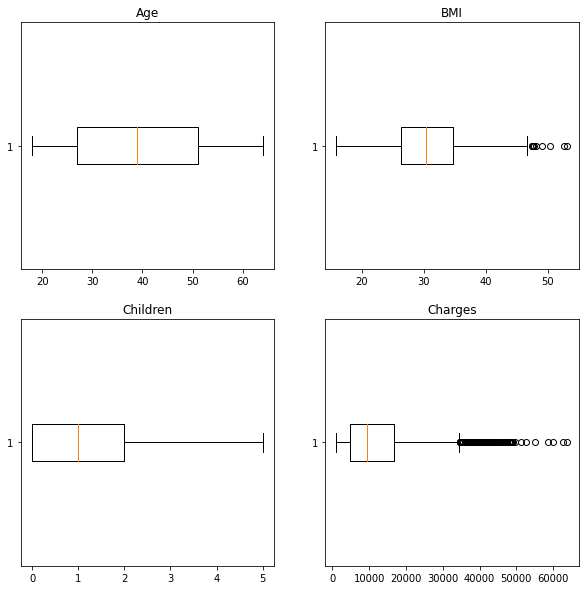

In [21]:
create_box_plots_numerical_fields()

In [22]:
# Histograms

In [23]:
def create_histograms_numerical_fields():
    fig, axes = plt.subplots(2, 2, figsize=(10, 10))

    axes[0, 0].hist(df['age'])
    axes[0, 0].set_title('Age')
    
    axes[0, 1].hist(df['bmi'])
    axes[0, 1].set_title('BMI')
    
    axes[1, 0].hist(df['children'])
    axes[1, 0].set_title('Children')
    
    axes[1, 1].hist(df['charges'])
    axes[1, 1].set_title('Charges')
    
    plt.show()
    


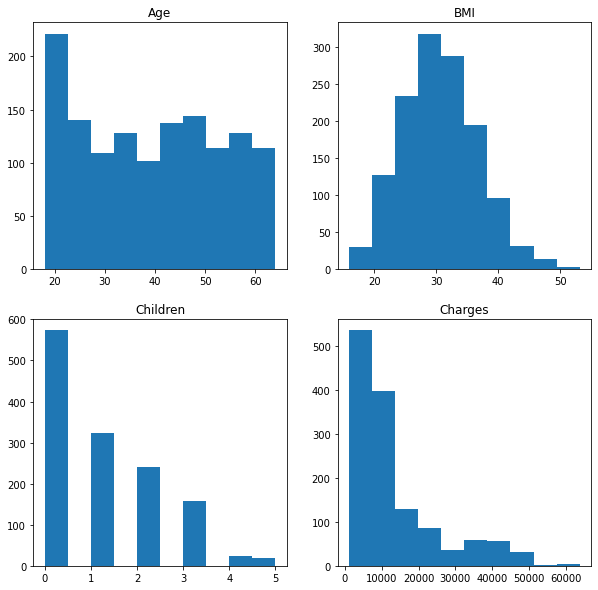

In [25]:
create_histograms_numerical_fields()

In [26]:
# Categorical fields

In [27]:
df['sex'].unique()


array(['female', 'male'], dtype=object)

In [28]:
df['smoker'].unique()


array(['yes', 'no'], dtype=object)

In [29]:
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [30]:
# exploration

In [31]:
def explore_category(field_name):
    values = df[field_name].value_counts()
    total_values = values.sum()
    percentages = round(values / total_values * 100, 2)
    
    summary = pd.DataFrame({
        'Values': values,
        'Percentages': percentages
    })
    
    return summary


In [32]:
explore_category('sex')


,Values,Percentages
male,675,50.49
female,662,49.51


In [33]:
explore_category('smoker')


,Values,Percentages
no,1063,79.51
yes,274,20.49


In [34]:
explore_category('region')


,Values,Percentages
southeast,364,27.23
southwest,325,24.31
northwest,324,24.23
northeast,324,24.23


In [35]:
# Visualization

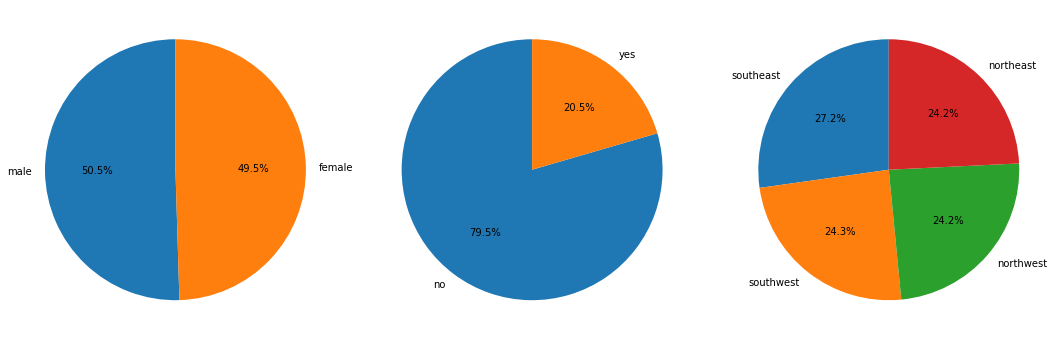

In [36]:
def create_pie_charts_categorical_fields():
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
        
    axes[0].pie(explore_category('sex')['Values'], labels=explore_category('sex').index, autopct='%1.1f%%', startangle=90)
    axes[1].pie(explore_category('smoker')['Values'], labels=explore_category('smoker').index, autopct='%1.1f%%', startangle=90)
    axes[2].pie(explore_category('region')['Values'], labels=explore_category('region').index, autopct='%1.1f%%', startangle=90)
    
    plt.tight_layout()
    plt.show()
    
create_pie_charts_categorical_fields()